In [1]:
import data_handler as dh
import visualization as viz
import spatial_features as spf
import game_state_representation as gsr
import pandas as pd

In [2]:
DATA_DIR_single = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8/fx-4sekj9hgwxzq3y4ih9415239w'
DATA_DIR = '../bru_data/data/comp-4zwgbb66rif2spcoeeol2motx/tmcl-1qtpbdbeudho5i7fu5z2lp2j8'

event_data_single = dh.read_event_data(DATA_DIR_single)
# event_data = dh.read_dir_event_data(DATA_DIR)

In [3]:
event_data_single.shape

(1749, 11)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

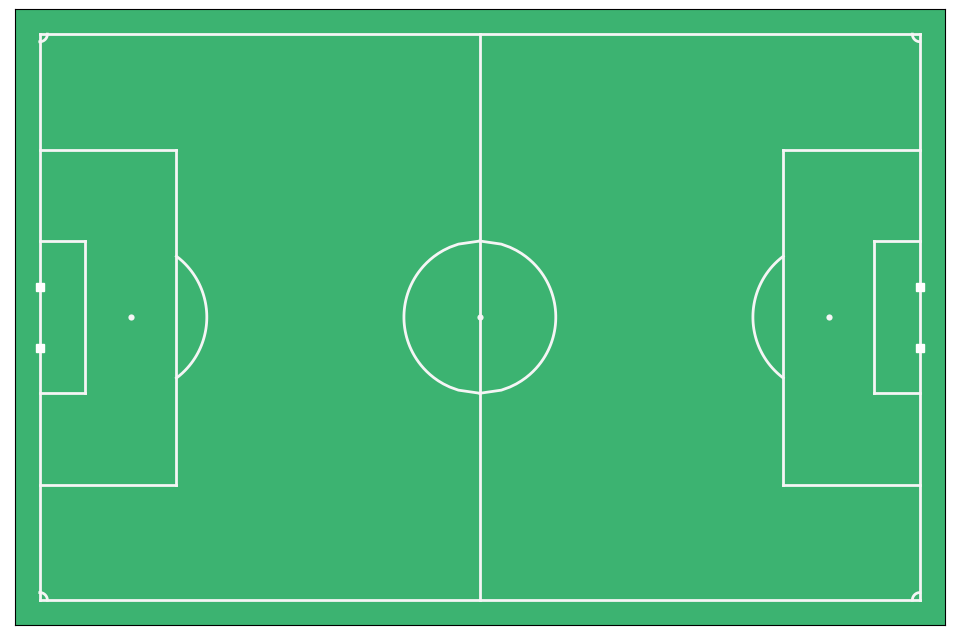

In [4]:
viz.plot_events(event_data_single.loc[10000:10020]) # TODO

In [5]:
tracking_single = dh.read_tracking_data_single(DATA_DIR_single)

In [6]:
tracking_single

,Timestamp,Framecount,Match period,Match status,Column 5,Ball xyz
0,1650807000000,0,1,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[52.4, 32.93, 0.0]"
1,1650807000100,100,1,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[52.45, 32.665, 0.0]"
2,1650807000200,200,1,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[52.5, 32.4, 0.0]"
3,1650807000300,300,1,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[52.565, 32.395, 0.0]"
4,1650807000400,400,1,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[52.65, 32.57, 0.0]"
...,...,...,...,...,...,...
56268,1650813517600,2917600,2,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[10.09, 58.46, 0.0]"
56269,1650813517700,2917700,2,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[9.62, 58.315, 0.0]"
56270,1650813517800,2917800,2,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[9.17, 58.18, 0.0]"
56271,1650813517900,2917900,2,0,"[{'Object type': '0', 'Player id': '13d7ao0j09...","[8.735, 58.045, 0.0]"


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

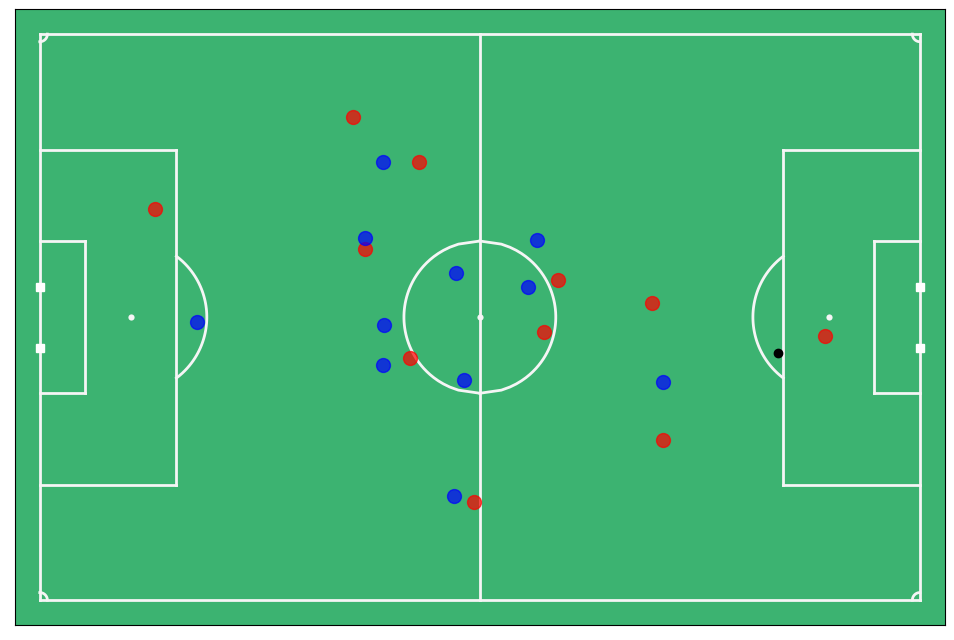

In [7]:
viz.plot_frame(tracking_single.iloc[10000])

In [8]:
tracking_single = spf.calc_spatial_features(tracking_single, calc_angle_goal=False, calc_distances=False)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

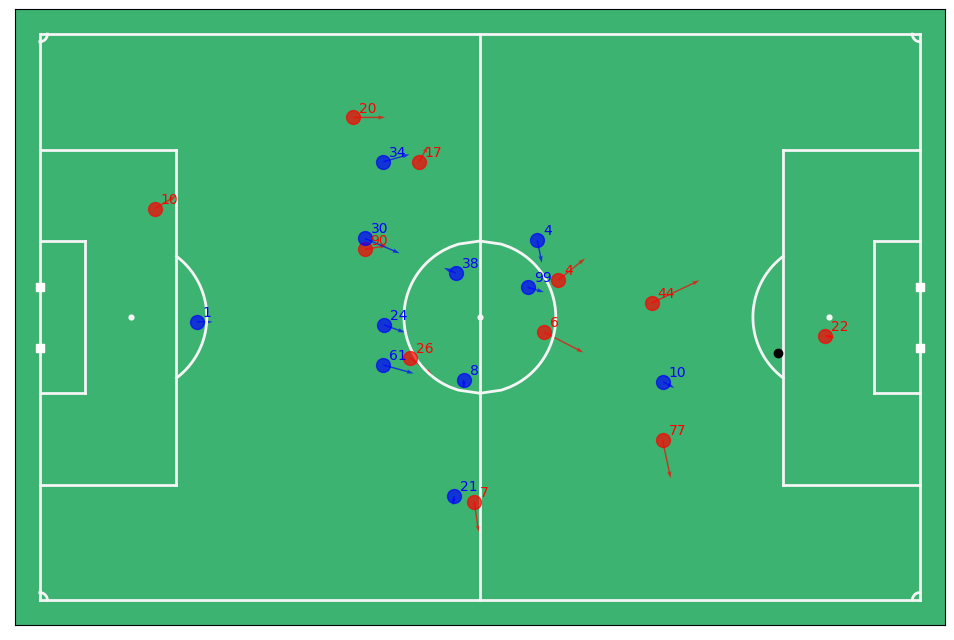

In [9]:
viz.plot_frame(tracking_single.iloc[10000], annotate=True, include_player_velocities=True)

In [10]:
frame = '1000'
match_period = '1'
attacking_team = '0'
snapshot = gsr.get_tracking_data_snapshot(tracking_single, frame, attacking_team, match_period)
loc_att, loc_def, vx_att, vx_def, vy_att, vy_def = gsr.get_loc_vel_matrices(tracking_single, frame, attacking_team, match_period)
dist_b, dist_g, angle_ball, angle_goal, angle_goal_rad = gsr.get_distances_angle_matrices(tracking_single, frame, match_period)
